In [1]:
import json
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Polygon
from scipy.interpolate import interp2d

## Read data prior

In [2]:
unit_operator = 10**(-6)
#unit_operator = 1
fim_converter = 1

# STD in MPa
measurement_std = 0.00008
#measurement_std = 0.0004

# MPa**2
measurement_var = measurement_std**2

print("Var:", measurement_var)

Var: 6.400000000000001e-09


In [3]:
# read prior
def read_fim(str_name, dim):
    f_prior = open(str_name)

    data_prior = json.load(f_prior)
    
    prior_info = data_prior[0]['Total']
    
    for i in range(dim):
        for j in range(dim):
            prior_info[i][j] *= unit_operator*unit_operator   
            prior_info[i][j] *= 1/measurement_var
            
    print(prior_info)
    print("Determinant:", np.linalg.det(prior_info))
    print("Trace:", np.trace(prior_info))
    eig_vals = list(np.linalg.eigvals(prior_info))
    print(eig_vals)
    print("Condition number:", max(eig_vals)/min(eig_vals))
    
    print(np.linalg.eig(prior_info))
    
    
    return prior_info
    
    



In [4]:
num_para = 6

file_name = 'emimtf2n_FIM_info/PR_quadTdep_unscaleParam.json'
#file_name = 'emimtf2n_FIM_info/SRK_noTdep.json'
#file_name = '125_emimtf2n_FIM_info/PR-3A.json'
#file_name = '32_bmimpf6_FIM_info/SRK-8-unscaleParam.json'


prior = read_fim(file_name, num_para)


[[68981699805.13986, -6228223346.16949, 73353874724.42805, -6368563509.767249, 78416465073.55919, -6542272045.4231615], [-6228223346.16949, 855068355.4842671, -6369932047.04054, 847814307.5064927, -6545148784.694958, 842976451.1216809], [73353874724.42805, -6369932047.04054, 78416465264.19662, -6543710339.995919, 84267314353.3549, -6754713056.17626], [-6368563509.767249, 847814307.5064927, -6543710339.995919, 842976464.8364737, -6756233361.041694, 840692845.7618853], [78416465073.55919, -6545148784.694958, 84267314353.3549, -6756233361.041694, 91019876702.80986, -7009027901.259253], [-6542272045.4231615, 842976451.1216809, -6754713056.17626, 840692845.7618853, -7009027901.259253, 841130982.0693018]]
Determinant: 3.726675977902775e+42
Trace: 240957217574.5364
[239239941491.94434, 1502688716.820512, 213286051.85864496, 1199019.3440447624, 101896.76431663094, 397.80467530558485]
Condition number: 601400527.3019112
(array([2.39239941e+11, 1.50268872e+09, 2.13286052e+08, 1.19901934e+06,
   

In [ ]:
cov = np.linalg.pinv(prior)
print(cov)

In [ ]:
corr = cov/measurement_var

print(corr)

In [ ]:
eig_test = np.linalg.eig(prior)[1]

In [ ]:
df = pd.DataFrame(corr)
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='welcome', index=False)
writer.save()


##  Read data 

In [5]:
# read prior

f = open('emimtf2n_FIM_info/PR_quad_543900_scaledBar_pa_scaleopt.json')
f2 = open('emimtf2n_FIM_info/PR_quad_543900_scaledBar_pa_scaleopt_pressure.json')
#f3 = open('emimtf2n_FIM_info/PR_quad_543900_scaledBar_under10.json')
#f4 = open('emimtf2n_FIM_info/PR_quad_543900_scaledBar_under10_pressure.json')

data = json.load(f)

data_pressure = json.load(f2)

#data_under10 = json.load(f3)
#data_pressure_under10 = json.load(f4)

In [6]:
T_range_overall = [273, 283, 293, 303, 313, 323, 333, 343, 353, 363, 373, 383, 393, 400]
x_range_overall = [0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [7]:
unit_operator = 10**(-6)
#unit_operator = 1
fim_converter = 1

# STD in MPa
measurement_std = 0.00008

# MPa**2
measurement_var = measurement_std**2

print("The unit operator converts units from Pa to Mpa:", unit_operator)
print(fim_converter)

The unit operator converts units from Pa to Mpa: 1e-06
1


In [8]:
# read prior
def remove_fim(idx_to_remove):
    f_prior = open('emimtf2n_FIM_info/PR_quadTdep_scaleopt.json')

    data_prior = json.load(f_prior)

    #prior_info = data[0]['Total']
    prior_info = [[0]*6 for i in range(6)]
    
    # remove idx
    for idx in idx_to_remove:
        for a in range(6):
            for b in range(6):
                prior_info[a][b] += data_prior[0][str(idx)][a][b]

    for i in range(6):
        for j in range(6):
            prior_info[i][j] *= unit_operator*unit_operator      
            prior_info[i][j] *= 1/measurement_var
            
    return prior_info



In [9]:
new_prior = [2, 3, 5, 12, 16, 19, 23, 26]
#new_prior = [32]
num_to_remove = []
for i in range(27):
    if i not in new_prior:
        num_to_remove.append(i)

fim_to_be_removed = remove_fim(num_to_remove)
print(fim_to_be_removed)

[[3972359432.9205556, -792742684.7168392, 7267896029.27245, -589310603.3312366, 2613057017.891038, -392109795.754366], [-792742684.7168392, 222672048.62558636, -1402364643.4722111, 161058996.46949044, -487170322.1566498, 104120661.05594714], [7267896029.27245, -1402364643.4722111, 13362348116.699062, -1046876769.2571727, 4827618464.218078, -699614136.5683205], [-589310603.3312366, 161058996.46949044, -1046876769.2571727, 116816886.73432724, -365270960.3932187, 75742728.3085034], [2613057017.891038, -487170322.1566498, 4827618464.218078, -365270960.3932187, 1752570179.34552, -245215668.30600548], [-392109795.754366, 104120661.05594714, -699614136.5683205, 75742728.3085034, -245215668.30600548, 49265800.12374889]]


In [10]:
def read_heatmap(T_range, x_range, data_set, pressure_data_set, remove=None):
    A_heatmap = np.zeros((len(T_range), len(x_range)))
    D_heatmap = np.zeros((len(T_range), len(x_range)))
    E_heatmap = np.zeros((len(T_range), len(x_range)))
    ME_heatmap = np.zeros((len(T_range), len(x_range)))

    pressure_heatmap = np.zeros((len(T_range), len(x_range)))

    for i in range(len(T_range)):
        for j in range(len(x_range)):
            count = i*len(x_range) + j 

            #fim = np.asarray(data_set[0][str(count)])
            # the recorded FIM (Q.T@Q) is based on MPa for measurements 
            # computed with 1 for meausrement STD 
            fim = np.asarray(data_set[0][str(count)])*fim_converter*fim_converter
            
            # factor in measurement STD; post processing step 
            fim *= 1/measurement_var
            
            print("before:", fim)
            
            # for the removing prior fn. Default is closed. 
            if remove:
                for a in range(6):
                    for b in range(6):
                        fim[a][b] -= remove[a][b]
                    
            fim = np.asarray(fim)
            print("after:", fim)
            
            
            A_heatmap[i,j] = np.trace(fim)
            D_heatmap[i,j] = np.linalg.det(fim)
            E_heatmap[i,j] = min(np.linalg.eigvals(fim))
            ME_heatmap[i,j] = np.linalg.cond(fim)

            # convert unit
            pressure_heatmap[i,j] = pressure_data_set[0][str(count)]*unit_operator
            
    return A_heatmap, D_heatmap, E_heatmap, ME_heatmap, pressure_heatmap

In [11]:
A_heatmap_overall, D_heatmap_overall, E_heatmap_overall, ME_heatmap_overall, pressure_heatmap_overall = read_heatmap(T_range_overall, x_range_overall, data, data_pressure, remove=fim_to_be_removed)


before: [[ 7.12120646e+09 -1.68690439e+09  1.30384168e+10 -1.24836145e+09
   4.69307330e+09 -8.27239647e+08]
 [-1.68690439e+09  6.07627089e+08 -2.97059662e+09  4.36023219e+08
  -1.02772544e+09  2.79658614e+08]
 [ 1.30384168e+10 -2.97059662e+09  2.39988943e+10 -2.20854131e+09
   8.68343281e+09 -1.47059214e+09]
 [-1.24836145e+09  4.36023219e+08 -2.20854131e+09  3.13759518e+08
  -7.67776477e+08  2.01847184e+08]
 [ 4.69307330e+09 -1.02772544e+09  8.68343281e+09 -7.67776477e+08
   3.15803478e+09 -5.13797310e+08]
 [-8.27239647e+08  2.79658614e+08 -1.47059214e+09  2.01847184e+08
  -5.13797310e+08  1.30272532e+08]]
after: [[ 3.14884703e+09 -8.94161704e+08  5.77052079e+09 -6.59050848e+08
   2.08001628e+09 -4.35129852e+08]
 [-8.94161704e+08  3.84955040e+08 -1.56823198e+09  2.74964223e+08
  -5.40555118e+08  1.75537953e+08]
 [ 5.77052079e+09 -1.56823198e+09  1.06365462e+10 -1.16166454e+09
   3.85581435e+09 -7.70978007e+08]
 [-6.59050848e+08  2.74964223e+08 -1.16166454e+09  1.96942631e+08
  -4.0250

In [12]:
#print(pressure_heatmap)

A_practical  = A_heatmap_overall.copy()
D_practical  = D_heatmap_overall.copy()
E_practical  = E_heatmap_overall.copy()
ME_practical  = ME_heatmap_overall.copy()
pressure_practical = pressure_heatmap_overall.copy()

for i in range(len(pressure_heatmap_overall)):
    for j in range(len(pressure_heatmap_overall[0])):
        if pressure_practical[i,j] > 2.5:
            pressure_practical[i,j] = float("NaN")
            
            A_practical[i,j] = float('NaN')
            E_practical[i,j] = float('NaN')
            D_practical[i,j] = float('NaN')
            ME_practical[i,j] = float('NaN')
print(pressure_practical)

[[0.00590856 0.82023171 0.06021042 0.12341964 0.19029836 0.26170991
  0.33879921 0.42303932 0.51608852 0.61874855 0.72607531]
 [0.0075743  0.03828353 0.07775459 0.16086372 0.25067115 0.34895459
  0.45809517 0.58113875 0.72127789 0.87859552 1.03498069]
 [0.0095625  0.04847587 0.09884085 0.20625891 0.32461259 0.45710706
  0.60813521 0.78345152 0.98917042 1.22471764 1.44827958]
 [0.01190591 0.06052318 0.12385536 0.26055407 0.41391968 0.5892926
  0.79421597 1.03898211 1.33528831 1.68344925 2.00140815]
 [0.01463627 0.07459674 0.15317713 0.32469661 0.52042804 0.74880535
  1.02217326 1.35831729 1.77977359 2.29451125        nan]
 [0.01778381 0.09086049 0.18717168 0.39961729 0.64598725 0.93908522
  1.29843126 1.75411345 2.35032514        nan        nan]
 [0.02137668 0.10946821 0.22618471 0.48621452 0.79243366 1.16368969
  1.63006329 2.24185035        nan        nan        nan]
 [0.02544053 0.13056076 0.27053583 0.58533829 0.96156069 1.42625881
  2.02486236        nan        nan        nan      

In [13]:
data_file = './emimtf2n/R32/Final_Results/MBDoE/r32_emimtf2n_subset.csv'
data_exp = pd.read_csv(data_file)
print(len(data_exp))

27


In [14]:
#print(D_practical)
import math
from scipy.interpolate import interp1d
#print(np.shape(D_practical))

T_range_lab = T_range_overall   
x_range_lab = [1, 5, 10,20,30,40,50,60,70,80,90]

edges = []
for i in range(14):
    for j in range(11):
        if math.isnan(D_practical[i,j]):
            #edges.append((i,j))
            edges.append((i, j-1))
            break;
            
#print(edges)

edges_map = []

for edge in edges:
    edges_map.append((T_range_lab[edge[0]], x_range_lab[edge[1]]))
    
#print(edges_map)

print(T_range_lab[edges[0][0]-1])

a, b = T_range_lab[edges[0][0]-1], edges_map[-1][1]

a_real = T_range_lab[edges[0][0]]

x =[edges_map[i][0] for i in range(len(edges_map))]
y =[edges_map[i][1] for i in range(len(edges_map))]
f = interp1d(x, y, kind='quadratic')

xnew = np.arange(a_real, 400)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
#print(ynew)

#print(x, y)
#print(f)

303


In [15]:
x_ax = T_range_lab
y_ax = x_range_lab 
z_ax = pressure_heatmap_overall

xnew = np.arange(285, 400, 0.1)
ynew = np.arange(18, 90, 0.1) 

f = interp2d(x_ax, y_ax, z_ax.T)

f_new = f(xnew, ynew)
print(np.shape(f_new))

f_newT =  f_new.T

x_15 = []
y_15 = []

for i in range(len(xnew)):
    for j in range(len(ynew)):
        if i>=1 and f_newT[i,j] >= 1.500000 and f_newT[i-1,j]<=1.500000:
            x_15.append(xnew[i])
            y_15.append(ynew[j])

(720, 1150)


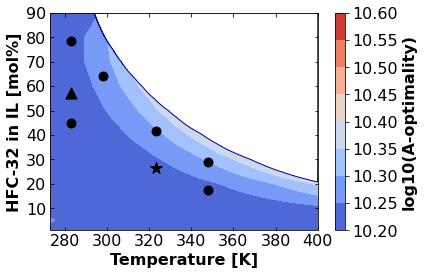

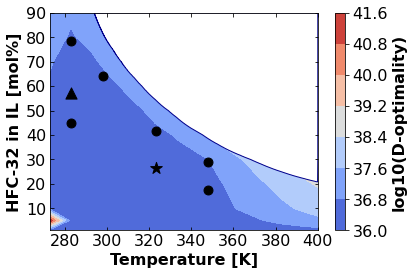

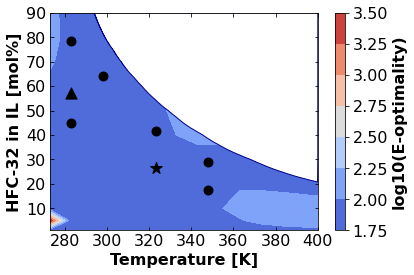

In [16]:
def contour(T_range_label, x_range_label, heatmap_data, bar_label, plot_prior=True):
    # draw figure, using (6,6) because the plot is small otherwise
    #fig, ax = plt.figure(figsize=(6,6))
    fig, ax = plt.subplots()
    
    # plot heatmap
    #   cmap defines the overall color within the heatmap 
    #   levels: determines the number and positions of the contour lines / regions.
    cs = plt.contourf(T_range_label, x_range_label, heatmap_data.T,cmap=cm.coolwarm)

    # plot color bar
    cbar = plt.colorbar(cs)

    # plot title in color bar
    cbar.ax.set_ylabel(bar_label, fontsize=16, fontweight='bold')

    # set font size in color bar
    cbar.ax.tick_params(labelsize=16)
    
    def func(x):
        return x*0.1

    #ix = np.linspace(a, b)
    #iy = func(ix)
    a_new = np.linspace(a, 400,1)
    upper_90 = [90 for i in range(len(a_new))]
    
    b_new = np.linspace(b, 90, 1)
    right_400 = [400 for j in range(len(b_new))]
    
    #verts = [(a, 90)] + list(zip(ix, iy)) + [(400, b)]
    #verts = list(zip(a_new, upper_90)) + list(zip(xnew, ynew)) + list(zip(right_400, b_new)) + [(400,90)]
    verts = list(zip(a_new, upper_90)) + list(zip(x_15, y_15)) + list(zip(right_400, b_new)) + [(400,90)]
    poly = Polygon(verts, facecolor='white', edgecolor='darkblue', closed=True)
    #polygon1 = Polygon([[0.5,0.2], [0.4,0.3], [0.6, 0.9],], closed=True, alpha=1)
    
    ax.add_patch(poly)

    # plot equipotential line
    #  [::10] means sampling 1 in every 10 samples
    #  colors define the color want to use, 'k' for black
    #  alpha is blending value, between 0 (transparent) and 1 (opaque).
    #  linestyle defines the linestyle.
    #  linewidth defines the width of line
    #cs2 = plt.contour(cs, levels=cs.levels[::10], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

    # plot the heatmap label
    #  %2.2f means keep to 2 digit
    #  fontsize defines the size of the text in figure
    #plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

    # define tick size
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tick_params(direction="in",top=True, right=True)

    # set squared figure
    if plot_prior:
        for i in new_prior:  
        #for i in range(len(data_exp)):
            if i==16:
                plt.scatter(data_exp.iloc[i]['temperature'], data_exp.iloc[i]['x_R32']*100, color="black",marker="*", s=150)
                
            elif i==3:
                plt.scatter(data_exp.iloc[i]['temperature'], data_exp.iloc[i]['x_R32']*100, color="black",marker="^", s=125)
                
            elif i in new_prior:
                plt.scatter(data_exp.iloc[i]['temperature'], data_exp.iloc[i]['x_R32']*100, color="black", s=80)
        
            #else:
            #plt.scatter(data_exp.iloc[i]['temperature'], data_exp.iloc[i]['x_R32']*100, color="darkgrey", s=20)
        
            
        
    # plot titile and x,y label
    plt.xlabel(r'Temperature [K]', fontsize=16, fontweight='bold')
    plt.ylabel(r'HFC-32 in IL [mol%]', fontsize=16, fontweight='bold')
    plt.show()

    # save figure (important for publications)
    # plt.savefig('heatmap.png',bbox_inches='tight')
    
    
T_range_lab = T_range_overall   
x_range_lab = [1, 5, 10,20,30,40,50,60,70,80,90]

#contour(T_range_lab, x_range_lab, np.log10(A_heatmap[:,:6]), 'log10(A-optimality)')
contour(T_range_lab, x_range_lab, np.log10(A_practical), 'log10(A-optimality)', plot_prior=True)
contour(T_range_lab, x_range_lab, np.log10(D_practical), 'log10(D-optimality)', plot_prior=True)
contour(T_range_lab, x_range_lab, np.log10(E_practical), 'log10(E-optimality)', plot_prior=True)



In [ ]:
contour(T_range_lab, x_range_lab, pressure_practical, 'Pressure [Mpa]', plot_prior=False)


## Draw prior pressure

In [ ]:
f5 = open('emimtf2n_FIM_info/PR_quadTdep_pressure.json')

data_prior = json.load(f5)

print(data_prior)
print(data_exp)

In [ ]:
def temperature_splitter(temp):

    temp_idx= data_exp.index[data_exp['temperature'] == temp].tolist()
    print(temp_idx)

    x = data_exp.loc[data_exp["temperature"]==temp]["x_R32"]

    y = [1E-6*data_prior[0][str(i)] for i in temp_idx]
    
    return x, y


In [ ]:
tmp283_x, tmp283_y = temperature_splitter(283.15)
tmp298_x, tmp298_y = temperature_splitter(298.15)
tmp323_x, tmp323_y = temperature_splitter(323.15)
tmp348_x, tmp348_y = temperature_splitter(348.05)

In [ ]:
plt.scatter(tmp283_x, tmp283_y, label="T=283 K")
plt.scatter(tmp298_x, tmp298_y, marker="*", label="T=298 K")
plt.scatter(tmp323_x, tmp323_y, marker="^", label="T=323 K")
plt.scatter(tmp348_x, tmp348_y, marker="s", label="T=348 K")

# define tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)

# plot titile and x,y label
plt.ylabel(r'Pressure [MPa]', fontsize=16, fontweight='bold')
plt.xlabel(r'HFC-32 in IL [mol%]', fontsize=16, fontweight='bold')
plt.legend()
plt.show()